### Life Expectancy 

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single dataset. On initial visual inspection of the data showed some missing values. As the datasets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo,Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model dataset. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

In [90]:
import numpy as np
import pandas as pd
import scipy 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_column", None)

In [195]:
data=pd.read_csv("/Users/Pradeepr/Desktop/Imarticus/Linear Regression/Linear Regression/Kaggel Project/Life Expectancy using Linear Regression/Life Expectancy Data.csv")


In [131]:
data.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness _1-19 years,thinness_5-9 years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

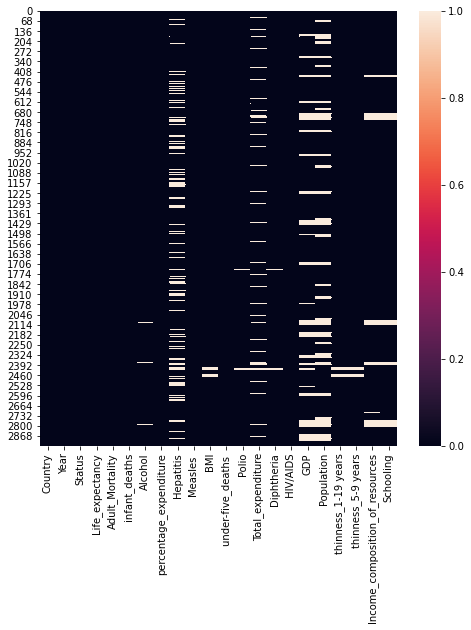

<Figure size 1080x1080 with 0 Axes>

In [17]:
sns.heatmap(pd.isnull(data));
plt.figure(figsize=(15,15))
plt.show()
# This plot highlights the null values

Let us write a simple algorithm which prints a dataframe which shows no. of nans from each column.

In [89]:
a=list(data.columns)
b=[]
for i in a:
    c=data[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df

,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,10
4,Adult Mortality,10
5,infant deaths,0
6,Alcohol,194
7,percentage expenditure,0
8,Hepatitis B,553
9,Measles,0


We can see in columns like `Life Expectancy` and `Adult Mortality` there were few Nans values which wasn't visible in our heatmap. So lets fill them up with their average value as they are Continous features.

In [196]:
data['Life_expectancy']=data['Life_expectancy'].fillna(value=data['Life_expectancy'].mean())

data['Adult_Mortality']=data['Adult_Mortality'].fillna(value=data['Adult_Mortality'].mean())


Now Lets move on to filling the other columns as well. We will move one by one by filling the Nans of each feature. Our next in target is "ALCOHOL" feature which has almost about 194 Nans.

But wait ! We are filling about 200 Nans, Is it ok fill Nans with MEAN this time ? the answer is absolutely Yes. But I thought of doing it in a different way. As it has Nans 20 times larger than the previous one, I thought to fill it using other column which represents best this column.

It is always good to fill Nans using bunch of different values as we know that a feature is less likely to have a continous value about 200 or more times and Iam pretty sure that by doing this we would definitely come up with a good result.

To do this let us first see the correlation matrix of these features using '.corr' method by pandas.

In [8]:
corr_data=data.corr()
corr_data

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.169623,-0.078861,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.169623,1.000000,-0.696359,-0.196535,0.404029,0.381791,0.255760,-0.157574,0.564466,-0.222503,0.464531,0.216373,0.478465,-0.556457,0.461393,-0.021548,-0.476561,-0.470977,0.724631,0.748263
Adult Mortality,-0.078861,-0.696359,1.000000,0.078747,-0.195454,-0.242814,-0.161828,0.031174,-0.384806,0.094135,-0.274218,-0.114355,-0.274540,0.523727,-0.296019,-0.013639,0.302501,0.308053,-0.457530,-0.452380
infant deaths,-0.037415,-0.196535,0.078747,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404029,-0.195454,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381791,-0.242814,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.255760,-0.161828,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157574,0.031174,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.564466,-0.384806,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222503,0.094135,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


As you can see there are some features that are quite well correlated with each other. So, we would impute these nans using the other features which are nicely correlated with eachother.

Let us now Visualise these correlation values using a heatmap again.

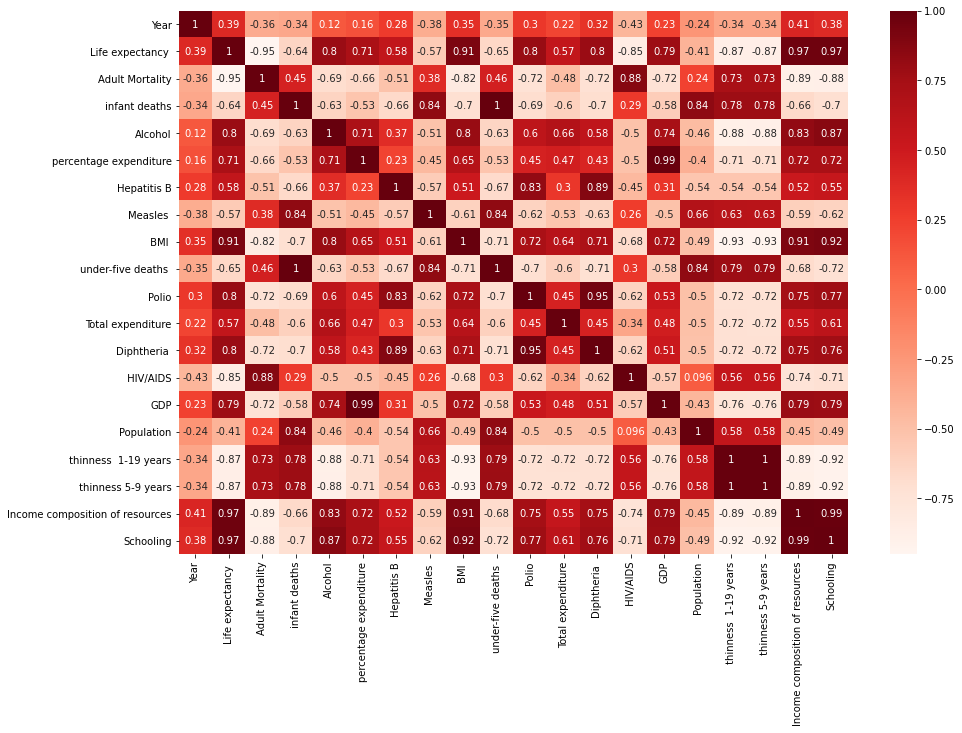

In [11]:
# Plotting a heatmap between the variables of dataset
plt.figure(figsize=(15,10))
sns.heatmap(corr_data.corr(), cmap = 'Reds',annot=True)
plt.show()

The DARKEST and the LIGHTEST blocks represets that there is a strong relationship between those attributes.

From the above correlation matrix 'Alcohol' feature nicely correlates with the 'Schooling' feature. Now lets plot a Scatterplot between them and observe the trend.

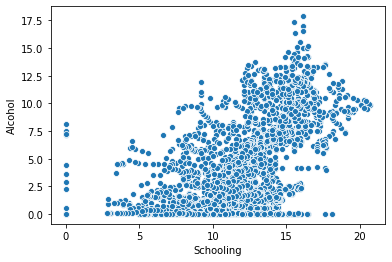

In [4]:
sns.scatterplot(x=data['Schooling'],y=data['Alcohol']);

#The semicolon atlast in the code is to hide the address of the plot which is not that required but I personally like doing that

* I have selected these values for imputing the Nans by observing a the trends in between selected interval.

Ex: The mean value of Alcohol which is in between 5-10 of Schooling column is 4.0

In [197]:
# These values are mean values of the selected interval of other feature.

def impute_Alcohol(cols):
    al=cols[0]
    sc=cols[1]
    if pd.isnull(al):
        if sc<=2.5:
            return 4.0
        elif 2.5<sc<=5.0:
            return 1.5
        elif 5.0<sc<=7.5:
            return 2.5
        elif 7.5<sc<=10.0:
            return 3.0
        elif 10.0<sc<=15:
            return 4.0
        elif sc>15:
            return 10.0
    else:
        return al
    
data['Alcohol']=data[['Alcohol','Schooling']].apply(impute_Alcohol,axis=1)

Now lets cross check whether values were filled or not by using the same heatmap.

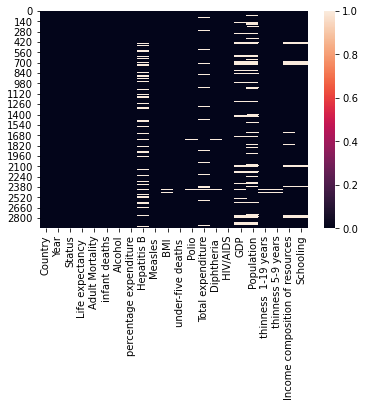

In [14]:
sns.heatmap(pd.isnull(data))

Looks like we are still left with some Nans. But why did this exactly happened ?

If we could observe from the heatmap the zone in which null values were failed to be filled is the same zone in which the other feature had its Null values. So for now lets fill those remaining Nans with the Mean Value.

In [198]:
data['Alcohol']=data['Alcohol'].fillna(value=data['Alcohol'].mean())


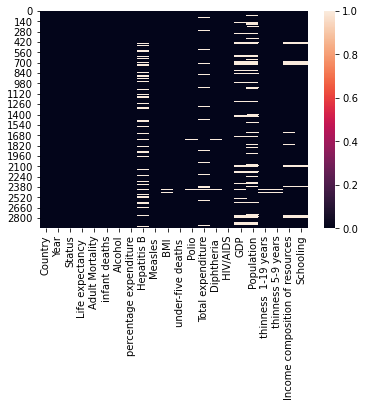

In [16]:
# Rechecking the Heatmap.
sns.heatmap(pd.isnull(data))

Now we dont have any null values in 'alcohol' column.

Lets look at the distribution of the alcohol column.

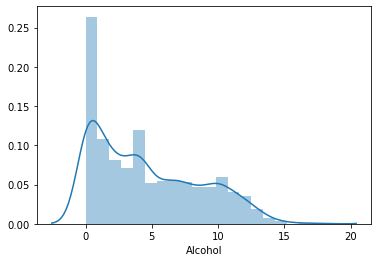

In [18]:
sns.distplot(data['Alcohol'])

There is a huge positive skew for this distribution. Lets look at its Kurtosis value.

In [19]:
scipy.stats.skew(data['Alcohol'],axis=0)

# This shows that this column has positive skew.

0.5964252568271255

Lets repeat this for imputing Nans for all other features as well.

#### Important observations:

* Now our next in list is 'Hepatatis B' which highly correlates with 'Diptheria', But both of them have null values in the same zone.

* If we want to impute 'Diptheria' first with highly correlated feature 'Polio' then that again would be of no use because it has again the same problem of null values(Nans) in same Zone.

** But luckily we found an option of imputing 'Polio' feature with the 'Life expactancy' which nicely correlates with it. So for now lets impute 'Polio' feature firstly with 'Life expactancy' and then would impute others using this

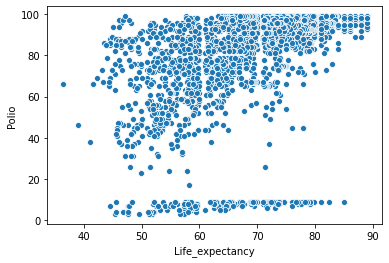

In [7]:
sns.scatterplot(x=data['Life_expectancy'],y=data['Polio']);

# Scattterplot between them.

Imputing the selected values for each interval. It is the same way like we did for the `Alcohol` feature.



In [199]:
def impute_polio(c):
    p=c[0]
    l=c[1]
    if pd.isnull(p):
        if l<=45:
            return 80.0
        elif 45<l<=50:
            return 67.0
        elif 50<l<=60:
            return 87.44
        elif 60<l<=70:
            return 91
        elif 70<l<=80:
            return 94.3
        elif l>80:
            return 95
    else:
        return p
    
data['Polio']=data[['Polio','Life_expectancy']].apply(impute_polio,axis=1)


Lets have a look at the Null values again

In [200]:
a=list(data.columns)
b=[]
for i in a:
    c=data[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df

,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life_expectancy,0
4,Adult_Mortality,0
5,infant_deaths,0
6,Alcohol,0
7,percentage_expenditure,0
8,Hepatitis,553
9,Measles,0


Now we dont have any nulls in `polio` section. Lets impute `Diphtheria` using `Polio` feature.

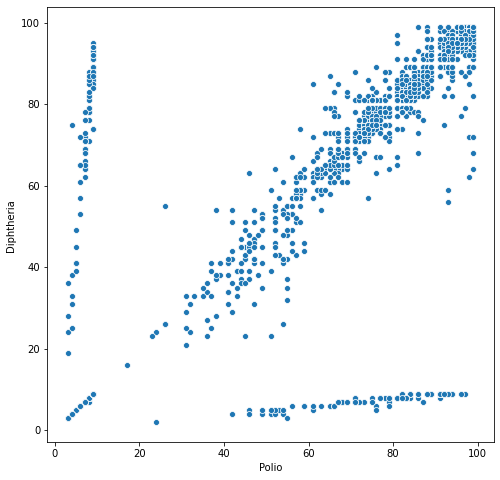

In [139]:
# Scatter plot between these features.

sns.scatterplot(x=data['Polio'],y=data['Diphtheria']);


In [201]:
def impute_Diptheria(c):
    d=c[0]
    p=c[1]
    if pd.isnull(d):
        if p<=10:
            return 75.0
        elif 10<p<=40:
            return 37.0
        elif 40<p<=45:
            return 40.0
        elif 45<p<=50:
            return 50.0
        elif 50<p<=60:
            return 55.0
        elif 60<p<=80:
            return 65.0
        elif p>80:
            return 90.0
    else:
        return d
data['Diphtheria']=data[['Diphtheria','Polio']].apply(impute_Diptheria,axis=1)


In [202]:
a=list(data.columns)
b=[]
for i in a:
    c=data[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df

# A look at the null values again.

,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life_expectancy,0
4,Adult_Mortality,0
5,infant_deaths,0
6,Alcohol,0
7,percentage_expenditure,0
8,Hepatitis,553
9,Measles,0


Now its time for imputing `Hepatitis B` using `Diptheria` feature.



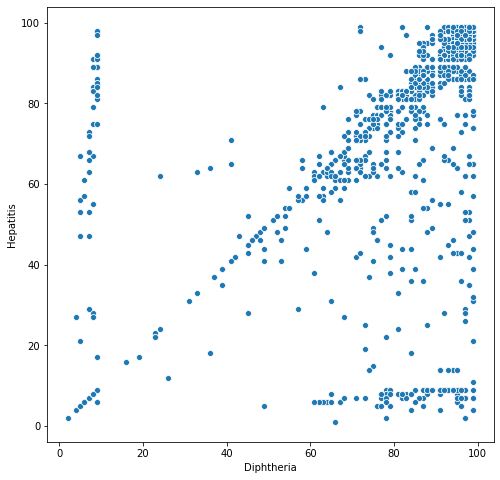

In [154]:
sns.scatterplot(x=data['Diphtheria'],y=data['Hepatitis']);

# Scatterplot between them.

In [203]:
def impute_HepatatisB(cols):
    hep=cols[0]
    dip=cols[1]
    if pd.isnull(hep):
        if dip<=15:
            return 75.0
        elif 15<dip<=30:
            return 20.0
        elif 30<dip<=45:
            return 38.0
        elif 45<dip<=60:
            return 43.0
        elif 60<dip<=80:
            return 63.0
        elif dip>80:
            return 88.4
    else:
        return hep
    
data['Hepatitis']=data[['Hepatitis','Diphtheria']].apply(impute_HepatatisB,axis=1)

In [156]:
data[data['Diphtheria']>80.0]['Hepatitis'].mean()

# Mean for imputing Diptheria Nans in 80-100 interval.

88.39573481687472

Now again cross checking the imputed values.

In [100]:
a=list(data.columns)
b=[]
for i in a:
    c=data[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df

,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,0
4,Adult Mortality,0
5,infant deaths,0
6,Alcohol,0
7,percentage expenditure,0
8,Hepatitis B,0
9,Measles,0


Lets repeat this for all the features.

#### Here is the list of features that we are going to impute with other features:

* Impute `BMI` feature with `Life expactancy` feature.


* Impute `Total expenditure` with `Alcohol` feature.


* Impute `GDP` feature with `percentage expenditure` feature.


* Impute `Population` feature with `Infant death` feature.


* Impute `Thin 1-19` feature with `BMI` feature.


* Impute `Thin 5-9` feature with `BMI` feature.


* Impute `Schooling` feature and `Income Composition of resources` feature with `Life expactancy` feature.


Lets begin the process of imputing.

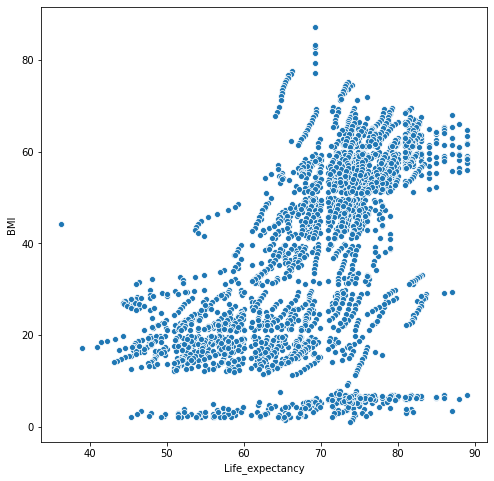

In [172]:
sns.scatterplot(x=data['Life_expectancy'],y=data['BMI']);


In [204]:
def impute_BMI(c):
    b=c[0]
    l=c[1]
    if pd.isnull(b):
        if l<=50:
            return 25.0
        elif 50<l<=60:
            return 25.0
        elif 60<l<=70:
            return 32.0
        elif 70<l<=80:
            return 46.8
        elif 80<l<=100:
            return 60.0
    else:
        return b
    
data['BMI']=data[['BMI','Life_expectancy']].apply(impute_BMI,axis=1)


In [32]:
a=list(data.columns)
b=[]
for i in a:
    c=data[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df


,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,0
4,Adult Mortality,0
5,infant deaths,0
6,Alcohol,0
7,percentage expenditure,0
8,Hepatitis B,0
9,Measles,0


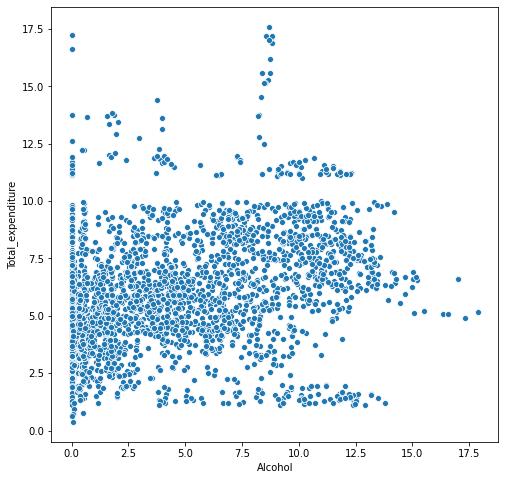

In [158]:
sns.scatterplot(y=data['Total_expenditure'],x=data['Alcohol']);

In [205]:
def impute_Total_exp(c):
    t=c[0]
    a=c[1]
    if pd.isnull(t):
        if a<=2.5:
            return 5.08
        elif 2.5<a<=5.0:
            return 6.0
        elif 5.0<a<=10.0:
            return 6.71
        elif 10.0<a<=12.5:
            return 6.9
        elif a>12.5:
            return 6.68
    else:
        return t
    
data['Total_expenditure']=data[['Total_expenditure','Alcohol']].apply(impute_Total_exp,axis=1)        


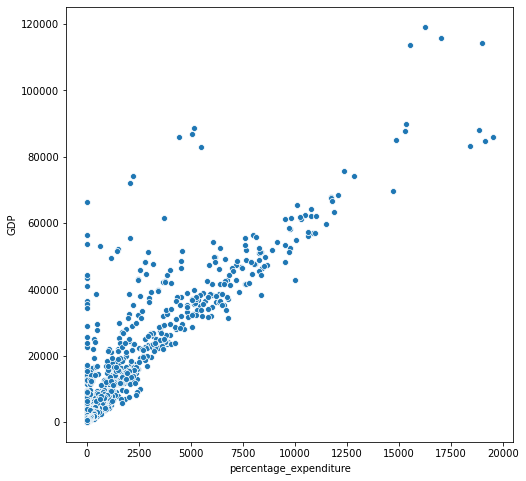

In [160]:
sns.scatterplot(x=data['percentage_expenditure'],y=data['GDP']);


In [206]:
def impute_GDP(c):
    g=c[0]
    p=c[1]
    if pd.isnull(g):
        if p<=1250:
            return 1100.0
        elif 1250<p<=2500:
            return 1800.0
        elif 2500<p<=3750:
            return 2900.0
        elif 3750<p<=7500:
            return 3500.0
        elif 7500<p<=8750:
            return 4500.0
        elif 8750<p<=10000:
            return 5000.0
        elif 10000<p<=11250:
            return 5700.0
        elif 11250<p<=12500:
            return 7000.0
        elif 12500<p<=15000:
            return 8000.0
        elif 15000<p<=17500:
            return 9000.0
        elif p>17500:
            return 8500.0
    else:
        return g
    
data['GDP']=data[['GDP','percentage_expenditure']].apply(impute_GDP,axis=1)


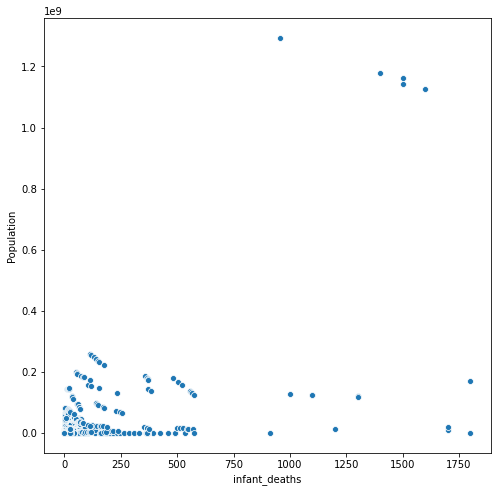

In [162]:
sns.scatterplot(x=data['infant_deaths'],y=data['Population']);


In [207]:
def impute_population(c):
    p=c[0]
    i=c[1]
    if pd.isnull(p):
        if i<=100:
            return 0.19*((10)**9)
        elif 100<i<=250:
            return 0.18*((10)**9)
        elif 250<i<=350:
            return 0.02*((10)**9)
        elif 350<i<=900:
            return 0.1*((10)**9)
        elif 900<i<=1100:
            return 0.18*((10)**9)
        elif 1100<i<=1250:
            return 0.05*((10)**9)
        elif 1250<i<=1500:
            return 0.19*((10)**9)
        elif 1500<i<=1750:
            return 0.05*((10)**9)
        elif i>1750:
            return 0.1*((10)**9)
    else:
        return p
    
data['Population']=data[['Population','infant_deaths']].apply(impute_population,axis=1)

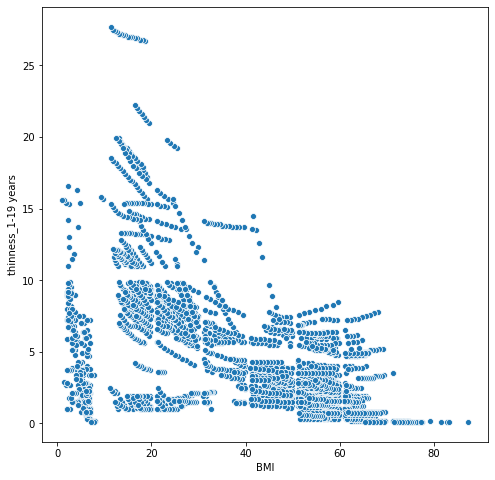

In [178]:
sns.scatterplot(x=data['BMI'],y=data['thinness_1-19 years']);


In [208]:
def impute_Thin_1(c):
    t=c[0]
    b=c[1]
    if pd.isnull(t):
        if b<=10:
            return 5.0
        elif 10<b<=20:
            return 10.0
        elif 20<b<=30:
            return 8.0
        elif 30<b<=40:
            return 6.0
        elif 40<b<=50:
            return 3.0
        elif 50<b<=70:
            return 4.0
        elif b>70:
            return 1.0
    else:
        return t
    
data['thinness_1-19 years']=data[['thinness_1-19 years','BMI']].apply(impute_Thin_1,axis=1)


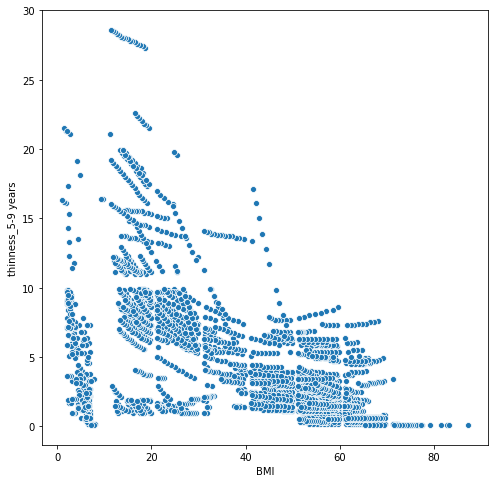

In [180]:
sns.scatterplot(x=data['BMI'],y=data['thinness_5-9 years']);


In [209]:
def impute_Thin_1(c):
    t=c[0]
    b=c[1]
    if pd.isnull(t):
        if b<=10:
            return 5.0
        elif 10<b<=20:
            return 10.0
        elif 20<b<=30:
            return 8.0
        elif 30<b<=40:
            return 6.0
        elif 40<b<=50:
            return 3.0
        elif 50<b<=70:
            return 4.0
        elif b>70:
            return 1.0
    else:
        return t
    
data['thinness_5-9 years']=data[['thinness_5-9 years','BMI']].apply(impute_Thin_1,axis=1)

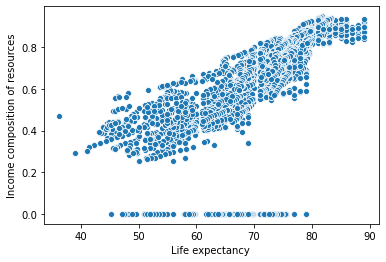

In [43]:
sns.scatterplot(x=data['Life_expectancy'],y=data['Income_composition_of_resources']);

In [210]:
def impute_Income(c):
    i=c[0]
    l=c[1]
    if pd.isnull(i):
        if l<=40:
            return 0.4
        elif 40<l<=50:
            return 0.42
        elif 50<l<=60:
            return 0.402
        elif 60<l<=70:
            return 0.54
        elif 70<l<=80:
            return 0.71
        elif l>80:
            return 0.88
    else:
        return i
        
data['Income_composition_of_resources']=data[['Income_composition_of_resources','Life_expectancy']].apply(impute_Income,axis=1)     


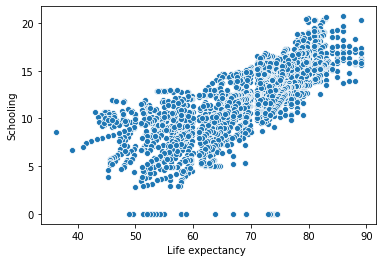

In [45]:
sns.scatterplot(x=data['Life_expectancy'],y=data['Schooling']);


In [211]:
def impute_schooling(c):
    s=c[0]
    l=c[1]
    if pd.isnull(s):
        if l<= 40:
            return 8.0
        elif 40<l<=44:
            return 7.5
        elif 44<l<50:
            return 8.1
        elif 50<l<=60:
            return 8.2
        elif 60<l<=70:
            return 10.5
        elif 70<l<=80:
            return 13.4
        elif l>80:
            return 16.5
    else:
        return s
    
data['Schooling']=data[['Schooling','Life_expectancy']].apply(impute_schooling,axis=1)

In [31]:
data[(data['Life_expectancy']>80) & (data['Life_expectancy']<=90)]['Schooling'].mean()

# Example of how iam deciding values for filling Nans above
# You can see above in range above 80 we got avg. as 16.5 so we have imputed it that way.

16.509881422924906

Now as we have finished filling Nans lets have a look at that null_df which shows no. of Nans.

In [212]:
a=list(data.columns)
b=[]
for i in a:
    c=data[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df

,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life_expectancy,0
4,Adult_Mortality,0
5,infant_deaths,0
6,Alcohol,0
7,percentage_expenditure,0
8,Hepatitis,0
9,Measles,0


Now none of them above features have Nans in them, Let us split the dataset and look for fitting a model.


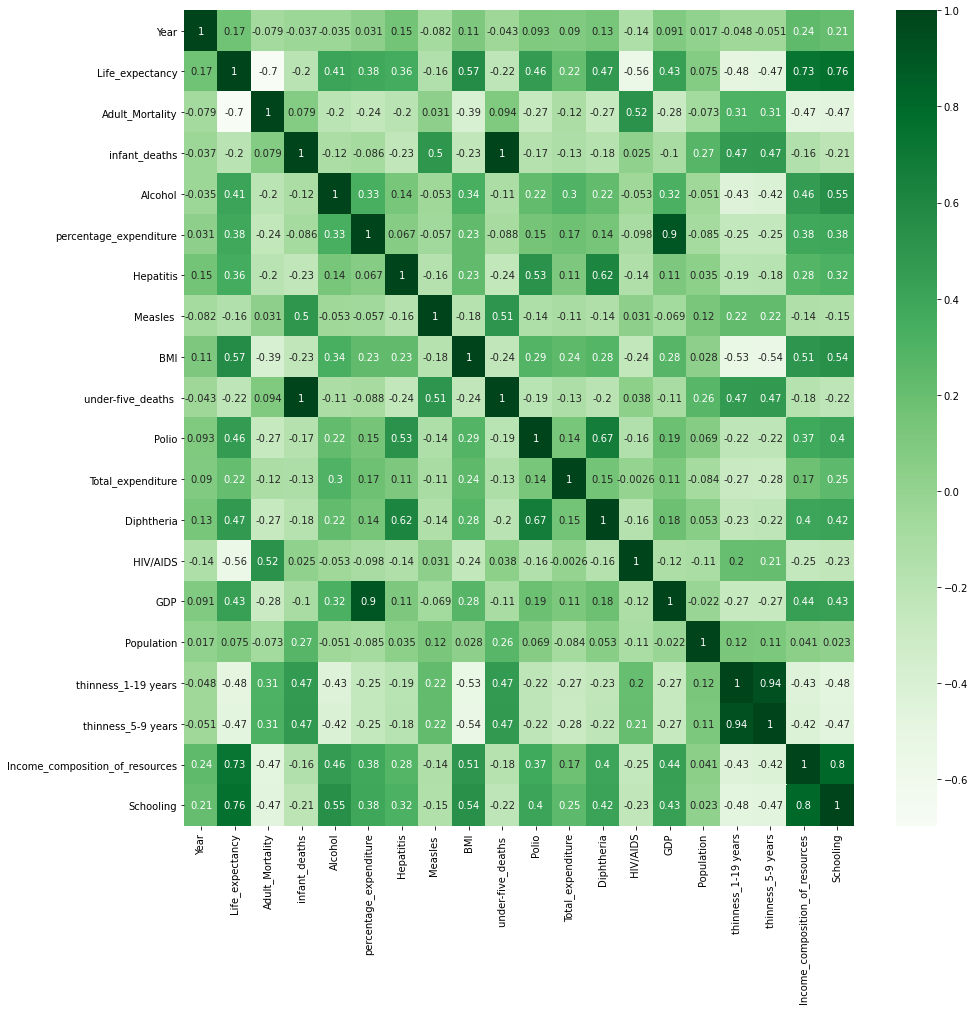

In [21]:
# Plotting a heatmap between the variables of dataset
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), cmap = 'Greens',annot=True)
plt.show()

In [213]:
del data["infant_deaths"]

In [214]:
del data["percentage_expenditure"]

In [215]:
del data["thinness_5-9 years"]

### Again seeing the correlation matix after droping infant_deaths, percentage_expenditure & thinness_5_9 years  

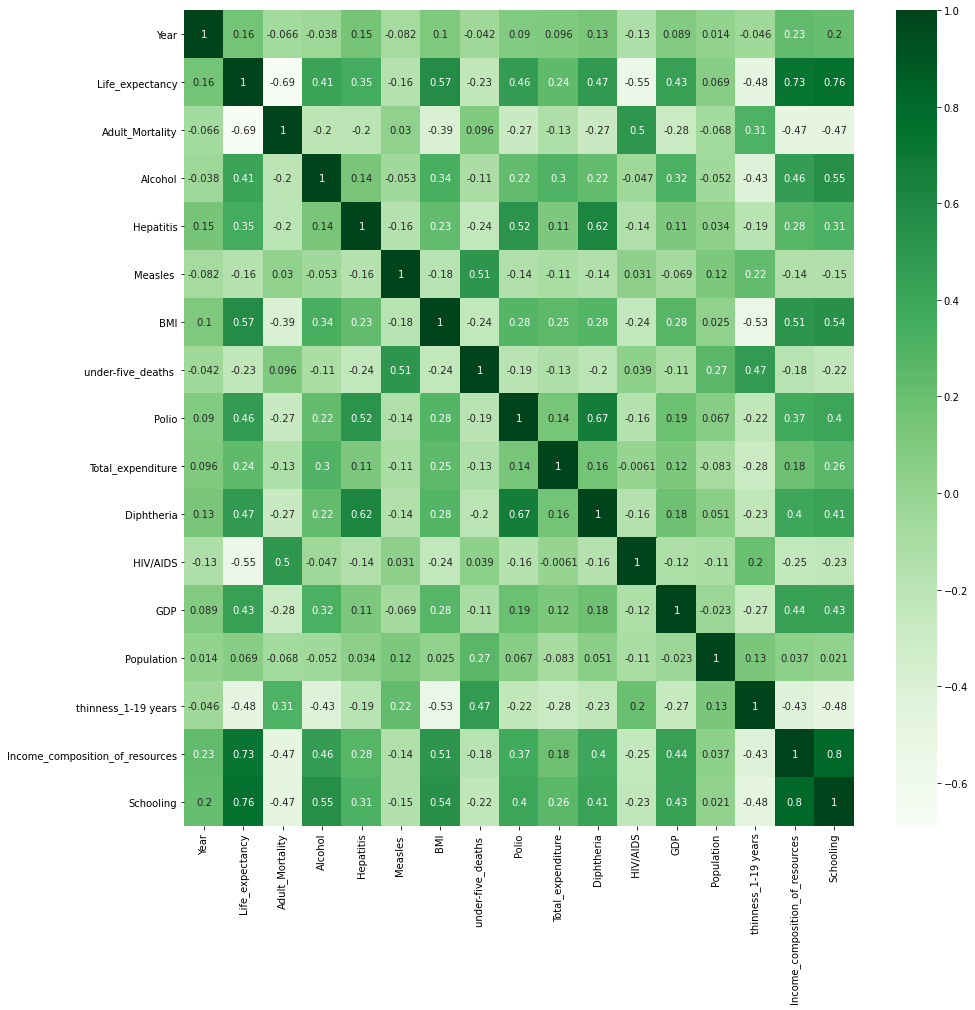

In [37]:
# Plotting a heatmap between the variables of dataset
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), cmap = 'Greens',annot=True)
plt.show()

### Check for the presence of Outliers

(2938, 19)

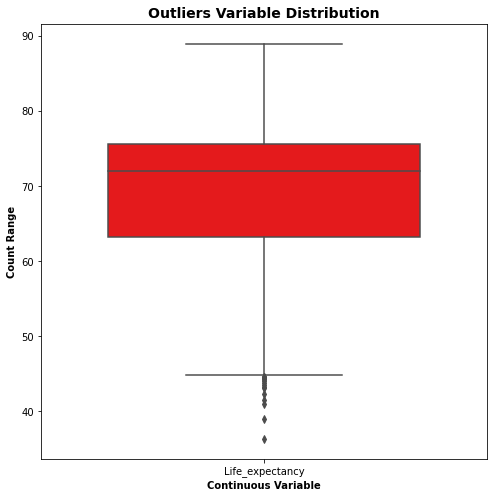

In [216]:
# Outlier Analysis of target variable

outliers = ['Life_expectancy']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=data[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Count Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
data.shape

Insight :
    * Droping all the Rows which are outliers

In [217]:
q3 = data.Life_expectancy.quantile(.75)
q1 = data.Life_expectancy.quantile(.25)

In [218]:
iqr = q3 - q1

In [219]:
ul = q3 + (1.5 * iqr)
ll = q1 -(1.5*iqr)

In [220]:
print(ul)
print(ll)

94.19999999999999
44.600000000000016


In [11]:
data.Life_expectancy[(data.Life_expectancy>ul)].value_counts().sum()

0

In [12]:
data.Life_expectancy[(data.Life_expectancy<ll)]

1127    36.3
1484    44.5
1582    44.6
1583    44.0
1584    43.5
1585    43.1
2306    44.3
2307    43.3
2308    42.3
2309    41.5
2311    41.0
2312    39.0
2920    44.6
2921    43.8
2932    44.6
2933    44.3
2934    44.5
Name: Life_expectancy, dtype: float64

In [221]:
data = data.drop([1127, 1484, 1582, 1583, 1584, 1585, 2306, 2307, 2308, 2309, 2311, 2312, 2920, 2921, 2932, 2933, 2934])


(2921, 19)

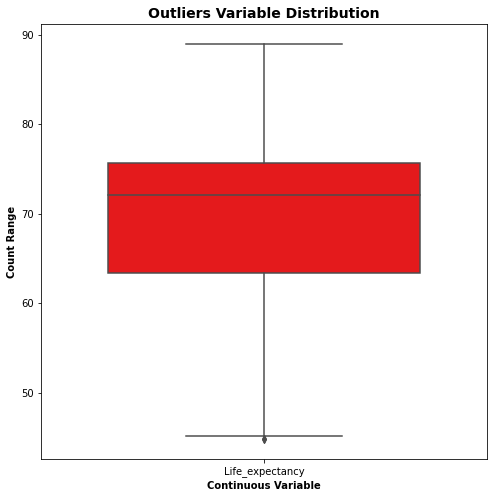

In [222]:
# Outlier Analysis of target variable

outliers = ['Life_expectancy']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=data[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Count Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
data.shape

#### Now Converting all the Object dataType to Int

In [223]:
data['Country'] = data['Country'].replace(['Afghanistan' , 'Albania' , 'Algeria' , 'Angola' , 'Antigua and Barbuda' , 'Argentina' , 'Armenia' , 'Australia' , 'Austria' , 'Azerbaijan' , 'Bahamas' , 'Bahrain' , 'Bangladesh' , 'Barbados' , 'Belarus' , 'Belgium' , 'Belize' , 'Benin' , 'Bhutan' , 'Bolivia (Plurinational State of)' , 'Bosnia and Herzegovina' , 'Botswana' , 'Brazil' , 'Brunei Darussalam' , 'Bulgaria' , 'Burkina Faso' , 'Burundi' , "Côte d'Ivoire" , 'Cabo Verde' , 'Cambodia' , 'Cameroon' , 'Canada' , 'Central African Republic' , 'Chad' , 'Chile' , 'China' , 'Colombia' , 'Comoros' , 'Congo' , 'Costa Rica' , 'Croatia' , 'Cuba' , 'Cyprus' , 'Czechia' , "Democratic People's Republic of Korea" , 'Democratic Republic of the Congo' , 'Denmark' , 'Djibouti' , 'Dominican Republic' , 'Ecuador' , 'Egypt' , 'El Salvador' , 'Equatorial Guinea' , 'Eritrea' , 'Estonia' , 'Ethiopia' , 'Fiji' , 'Finland' , 'France' , 'Gabon' , 'Gambia' , 'Georgia' , 'Germany' , 'Ghana' , 'Greece' , 'Grenada' , 'Guatemala' , 'Guinea' , 'Guinea-Bissau' , 'Guyana' , 'Haiti' , 'Honduras' , 'Hungary' , 'Iceland' , 'India' , 'Indonesia' , 'Iran (Islamic Republic of)' , 'Iraq' , 'Ireland' , 'Israel' , 'Italy' , 'Jamaica' , 'Japan' , 'Jordan' , 'Kazakhstan' , 'Kenya' , 'Kiribati' , 'Kuwait' , 'Kyrgyzstan' , "Lao People's Democratic Republic" , 'Latvia' , 'Lebanon' , 'Lesotho' , 'Liberia' , 'Libya' , 'Lithuania' , 'Luxembourg' , 'Madagascar' , 'Malawi' , 'Malaysia' , 'Maldives' , 'Mali' , 'Malta' , 'Mauritania' , 'Mauritius' , 'Mexico' , 'Micronesia (Federated States of)' , 'Mongolia' , 'Montenegro' , 'Morocco' , 'Mozambique' , 'Myanmar' , 'Namibia' , 'Nepal' , 'Netherlands' , 'New Zealand' , 'Nicaragua' , 'Niger' , 'Nigeria' , 'Norway' , 'Oman' , 'Pakistan' , 'Panama' , 'Papua New Guinea' , 'Paraguay' , 'Peru' , 'Philippines' , 'Poland' , 'Portugal' , 'Qatar' , 'Republic of Korea' , 'Republic of Moldova' , 'Romania' , 'Russian Federation' , 'Rwanda' , 'Saint Lucia' , 'Saint Vincent and the Grenadines' , 'Samoa' , 'Sao Tome and Principe' , 'Saudi Arabia' , 'Senegal' , 'Serbia' , 'Seychelles' , 'Sierra Leone' , 'Singapore' , 'Slovakia' , 'Slovenia' , 'Solomon Islands' , 'Somalia' , 'South Africa' , 'South Sudan' , 'Spain' , 'Sri Lanka' , 'Sudan' , 'Suriname' , 'Swaziland' , 'Sweden' , 'Switzerland' , 'Syrian Arab Republic' , 'Tajikistan' , 'Thailand' , 'The former Yugoslav republic of Macedonia' , 'Timor-Leste' , 'Togo' , 'Tonga' , 'Trinidad and Tobago' , 'Tunisia' , 'Turkey' , 'Turkmenistan' , 'Uganda' , 'Ukraine' , 'United Arab Emirates' , 'United Kingdom of Great Britain and Northern Ireland' , 'United Republic of Tanzania' , 'United States of America' , 'Uruguay' , 'Uzbekistan' , 'Vanuatu' , 'Venezuela (Bolivarian Republic of)' , 'Viet Nam' , 'Yemen' , 'Zambia' , 'Zimbabwe' , 'Cook Islands' , 'Dominica' , 'Marshall Islands' , 'Monaco' , 'Nauru' , 'Niue' , 'Palau' , 'Saint Kitts and Nevis' , 'San Marino' , 'Tuvalu'], [1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30 ,31 ,32 ,33 ,34 ,35 ,36 ,37 ,38 ,39 ,40 ,41 ,42 ,43 ,44 ,45 ,46 ,47 ,48 ,49 ,50 ,51 ,52 ,53 ,54 ,55 ,56 ,57 ,58 ,59 ,60 ,61 ,62 ,63 ,64 ,65 ,66 ,67 ,68 ,69 ,70 ,71 ,72 ,73 ,74 ,75 ,76 ,77 ,78 ,79 ,80 ,81 ,82 ,83 ,84 ,85 ,86 ,87 ,88 ,89 ,90 ,91 ,92 ,93 ,94 ,95 ,96 ,97 ,98 ,99 ,100 ,101 ,102 ,103 ,104 ,105 ,106 ,107 ,108 ,109 ,110 ,111 ,112 ,113 ,114 ,115 ,116 ,117 ,118 ,119 ,120 ,121 ,122 ,123 ,124 ,125 ,126 ,127 ,128 ,129 ,130 ,131 ,132 ,133 ,134 ,135 ,136 ,137 ,138 ,139 ,140 ,141 ,142 ,143 ,144 ,145 ,146 ,147 ,148 ,149 ,150 ,151 ,152 ,153 ,154 ,155 ,156 ,157 ,158 ,159 ,160 ,161 ,162 ,163 ,164 ,165 ,166 ,167 ,168 ,169 ,170 ,171 ,172 ,173 ,174 ,175 ,176 ,177 ,178 ,179 ,180 ,181 ,182 ,183 ,184 ,185 ,186 ,187 ,188 ,189 ,190 ,191 ,192 ,193])


In [224]:
data['Status'] = data['Status'].replace(['Developing', 'Developed'],[1, 2])

### Splitting the Data into Training and Testing Sets

In [225]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [226]:
# Let us divide the dataframe df into 70/30 ratio

# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)           

data_train, data_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 333) 

In [44]:
data_train.shape

(2044, 19)

In [45]:
data_test.shape

(877, 19)

In [46]:
data.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,Alcohol,Hepatitis,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1_19 years,Income_composition_of_resources,Schooling
0,1,2015,1,65.0,263.0,0.01,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,0.479,10.1
1,1,2014,1,59.9,271.0,0.01,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,0.476,10.0
2,1,2013,1,59.9,268.0,0.01,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,0.470,9.9
3,1,2012,1,59.5,272.0,0.01,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,0.463,9.8
4,1,2011,1,59.2,275.0,0.01,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,0.454,9.5


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2921 entries, 0 to 2937
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2921 non-null   int64  
 1   Year                             2921 non-null   int64  
 2   Status                           2921 non-null   int64  
 3   Life_expectancy                  2921 non-null   float64
 4   Adult_Mortality                  2921 non-null   float64
 5   Alcohol                          2912 non-null   float64
 6   Hepatitis                        2921 non-null   float64
 7   Measles                          2921 non-null   int64  
 8   BMI                              2921 non-null   float64
 9   under-five_deaths                2921 non-null   int64  
 10  Polio                            2921 non-null   float64
 11  Total_expenditure                2912 non-null   float64
 12  Diphtheria          

### Rescaling the Features 

For Simple Linear Regression, scaling doesn't impact model. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients.
There are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

Here, we will use Min-Max scaling.

In [227]:
numeric_columns = ['Life_expectancy','Adult_Mortality','Alcohol','Hepatitis','Measles','BMI','under-five_deaths ','Polio','Total_expenditure','Diphtheria','GDP',' HIV/AIDS','Population','thinness_1-19 years','Income_composition_of_resources','Schooling']                                                             



In [228]:
data_train[numeric_columns]

,Life_expectancy,Adult_Mortality,Alcohol,Hepatitis,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,GDP,HIV/AIDS,Population,thinness_1-19 years,Income_composition_of_resources,Schooling
1866,73.2,154.0,3.38,98.0,0,5.2,3,99.0,6.58,98.0,1526.497938,0.1,5737723.0,1.9,0.614,11.4
2112,68.0,242.0,8.36,98.0,34,48.7,1,98.0,1.63,97.0,1100.000000,0.1,190000000.0,3.1,0.540,10.5
1888,52.9,279.0,0.11,38.0,63057,15.0,118,45.0,6.61,43.0,232.566157,1.6,1312712.0,12.1,0.270,3.1
759,69.0,279.0,0.49,89.0,48,31.7,2,89.0,8.37,89.0,1253.657431,3.2,83684.0,5.7,0.436,5.3
824,71.4,23.0,2.55,91.0,0,52.1,2,91.0,6.83,91.0,3366.482133,0.3,6137276.0,1.7,0.662,12.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,74.0,86.0,0.01,99.0,13,68.4,1,98.0,2.76,98.0,38497.616960,0.1,190000000.0,3.3,0.790,13.5
1977,62.4,281.0,0.01,73.0,12,47.2,13,8.0,4.78,79.0,229.953640,0.8,7592865.0,1.3,0.506,10.0
1444,74.1,161.0,10.37,94.0,0,6.2,0,94.0,5.67,94.0,1532.229240,0.1,212647.0,2.2,0.814,15.4
973,57.3,296.0,2.51,95.0,0,2.3,6,88.0,4.35,87.0,1100.000000,2.9,190000000.0,9.4,0.404,7.6


In [229]:
scaler = MinMaxScaler()

data_train[numeric_columns] = scaler.fit_transform(data_train[numeric_columns])

<ipython-input-229-b59d313edf37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train[numeric_columns] = scaler.fit_transform(data_train[numeric_columns])
/Users/amruthabh/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### Dividing into X and Y sets for the model building

In [230]:
data_train.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'Alcohol', 'Hepatitis', 'Measles', 'BMI', 'under-five_deaths ', 'Polio',
       'Total_expenditure', 'Diphtheria', ' HIV/AIDS', 'GDP', 'Population',
       'thinness_1-19 years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [231]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2044 entries, 1866 to 1810
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2044 non-null   int64  
 1   Year                             2044 non-null   int64  
 2   Status                           2044 non-null   int64  
 3   Life_expectancy                  2044 non-null   float64
 4   Adult_Mortality                  2044 non-null   float64
 5   Alcohol                          2044 non-null   float64
 6   Hepatitis                        2044 non-null   float64
 7   Measles                          2044 non-null   float64
 8   BMI                              2044 non-null   float64
 9   under-five_deaths                2044 non-null   float64
 10  Polio                            2044 non-null   float64
 11  Total_expenditure                2044 non-null   float64
 12  Diphtheria       

In [232]:
y_train = data_train.pop('Life_expectancy')
X_train = data_train

In [233]:
X_train.head()

,Country,Year,Status,Adult_Mortality,Alcohol,Hepatitis,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19 years,Income_composition_of_resources,Schooling
1866,117,2010,1,0.219198,0.194798,0.989691,0.000000,0.051033,0.0012,1.000000,0.357444,0.989691,0.000000,0.013172,0.004435,0.065217,0.647679,0.558824
2112,132,2006,1,0.345272,0.482659,0.989691,0.000160,0.579587,0.0004,0.989583,0.059072,0.979381,0.000000,0.009488,0.146847,0.108696,0.569620,0.514706
1888,118,2004,1,0.398281,0.005780,0.371134,0.297182,0.170109,0.0472,0.437500,0.359253,0.422680,0.029703,0.001995,0.001015,0.434783,0.284810,0.151961
759,48,2009,1,0.398281,0.027746,0.896907,0.000226,0.373026,0.0008,0.895833,0.465341,0.896907,0.061386,0.010815,0.000065,0.202899,0.459916,0.259804
824,52,2009,1,0.031519,0.146821,0.917526,0.000000,0.620899,0.0008,0.916667,0.372514,0.917526,0.003960,0.029067,0.004743,0.057971,0.698312,0.627451


In [77]:
y_train.head()

1866    73.2
2112    68.0
1888    52.9
759     69.0
824     71.4
Name: Life_expectancy, dtype: float64

### Building a linear model

In [234]:
#Build a linear model

import statsmodels.api as sm

# Add a constant
X_train_p_value_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train).fit()

In [235]:
print(lr.summary())

                                 OLS Regression Results                                
Dep. Variable:        Life_expectancy   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              5301.
Date:                Thu, 03 Mar 2022   Prob (F-statistic):                        0.00
Time:                        17:55:32   Log-Likelihood:                          2122.5
No. Observations:                2044   AIC:                                     -4209.
Df Residuals:                    2026   BIC:                                     -4108.
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

### RFE
Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)



In [175]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [256]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,13)             # running RFE
rfe = rfe.fit(X_train, y_train)

/Users/amruthabh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_features_to_select=13 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [257]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Country', False, 6),
 ('Year', False, 5),
 ('Status', False, 2),
 ('Adult_Mortality', True, 1),
 ('Alcohol', False, 3),
 ('Hepatitis', False, 4),
 ('Measles', True, 1),
 ('BMI', True, 1),
 ('under-five_deaths ', True, 1),
 ('Polio', True, 1),
 ('Total_expenditure', True, 1),
 ('Diphtheria', True, 1),
 (' HIV/AIDS', True, 1),
 ('GDP', True, 1),
 ('Population', True, 1),
 ('thinness_1-19 years', True, 1),
 ('Income_composition_of_resources', True, 1),
 ('Schooling', True, 1)]

In [258]:
# Selecting the variables which are in support

col = X_train.columns[rfe.support_]
col

Index(['Adult_Mortality', 'Measles', 'BMI', 'under-five_deaths ', 'Polio',
       'Total_expenditure', 'Diphtheria', ' HIV/AIDS', 'GDP', 'Population',
       'thinness_1-19 years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [259]:
# Selecting the variables which are not in support

X_train.columns[~rfe.support_]

Index(['Country', 'Year', 'Status', 'Alcohol', 'Hepatitis'], dtype='object')

### Building model using statsmodel, for the detailed statistics

In [260]:
# Creating X_test dataframe with RFE selected variables
X_train_ml = X_train[col]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_ml)

# build the model
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     770.9
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:59:07   Log-Likelihood:                 2114.4
No. Observations:                2044   AIC:                            -4201.
Df Residuals:                    2030   BIC:                            -4122.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [261]:
X_train_ml.columns

Index(['Adult_Mortality', 'Measles', 'BMI', 'under-five_deaths ', 'Polio',
       'Total_expenditure', 'Diphtheria', ' HIV/AIDS', 'GDP', 'Population',
       'thinness_1-19 years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

### Feature Selection and consolidation

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

We encounter either of these conditions wrt VIF and p-value
1. High p-value [p> 0.05]
2. Low p-value and high VIF
    - High VIF [Remove these where VIF > 5] unless it has business importance
3. Low p-value and low VIF

In [262]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_ml
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Schooling,40.14
11,Income_composition_of_resources,29.87
6,Diphtheria,23.74
4,Polio,23.60
2,BMI,7.68
5,Total_expenditure,6.23
0,Adult_Mortality,3.57
10,thinness_1-19 years,3.30
3,under-five_deaths,1.82
8,GDP,1.54


### Year, Schooling, Income_composition_of_resources, Polio, Diphtheria, Status, had high  VIF and hence it should be dropped

In [ ]:
# dropping variable 

X_train_ml.drop('Year',  axis = 1, inplace = True)

In [ ]:
X_train_ml.drop('Schooling',  axis = 1, inplace = True)
X_train_ml.drop('Income_composition_of_resources',  axis = 1, inplace = True)
X_train_ml.drop('Polio',  axis = 1, inplace = True)
X_train_ml.drop('Diphtheria',  axis = 1, inplace = True)

### Creating another model using updated feature variables

In [265]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_ml)

# building the model
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# Adding a constant variable 

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     534.2
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:59:54   Log-Likelihood:                 1533.7
No. Observations:                2044   AIC:                            -3047.
Df Residuals:                    2034   BIC:                            -2991.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5625    

In [250]:
X_train_ml.columns

Index(['Adult_Mortality', 'under-five_deaths ', ' HIV/AIDS', 'GDP'], dtype='object')

In [266]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_ml
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Total_expenditure,4.77
2,BMI,4.23
0,Adult_Mortality,3.40
8,thinness_1-19 years,2.76
3,under-five_deaths,1.77
5,HIV/AIDS,1.49
7,Population,1.45
6,GDP,1.37
1,Measles,1.36


`Total_expenditure` has a VIF close to 5 and hence it should be dropped

In [267]:
# dropping variable 'windspeed' as is highly correlated and insignificant variable (high VIF)

X_train_ml.drop('Total_expenditure', axis = 1, inplace = True)

/Users/amruthabh/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Creating another model using updated feature variables¶

In [268]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_ml)

# Building the model
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     580.9
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:00:23   Log-Likelihood:                 1509.1
No. Observations:                2044   AIC:                            -3000.
Df Residuals:                    2035   BIC:                            -2950.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.6055    

In [269]:
X_train_ml.columns

Index(['Adult_Mortality', 'Measles', 'BMI', 'under-five_deaths ', ' HIV/AIDS',
       'GDP', 'Population', 'thinness_1-19 years'],
      dtype='object')

### Checking VIF

In [270]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_ml
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Adult_Mortality,3.18
7,thinness_1-19 years,2.67
2,BMI,2.32
3,under-five_deaths,1.77
4,HIV/AIDS,1.49
6,Population,1.45
1,Measles,1.36
5,GDP,1.35


### Insights:
- This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

## Analysis of the train data

**Assumptions for Linear Regression**

1. Linearity
2. Mean of Residuals
3. Check for Homoscedasticity
4. Check for Normality of error terms/residuals
5. No autocorrelation of residuals
6. No perfect multicollinearity

In [271]:
lm.predict(X_train_rfe)

1866    0.503951
2112    0.552174
1888    0.303078
759     0.423000
824     0.705318
          ...   
1399    0.811679
1977    0.503004
1444    0.499371
973     0.345698
1810    0.040232
Length: 2044, dtype: float64

In [272]:
# Predicting the cnt of training set.
y_train_pred = lm.predict(X_train_rfe)

In [287]:
from cmath import sqrt
from cmath import log


In [289]:
#Checking for Mean of Residuals

residuals = y_train - y_train_pred
mean_residual = np.mean(residuals)
print('Mean of Residual: {}'.format(mean_residual))
rmse = sqrt(mean_residual)
print(rmse)

Mean of Residual: -1.9464072667165524e-15
4.41181058831468e-08j


#### Insight: The residuals seem small and unstructured

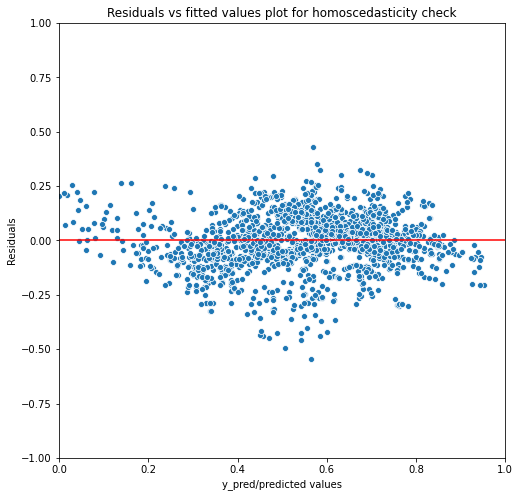

In [290]:
#Check for Homoscedasticity
p = sns.scatterplot(y_train_pred, residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-1,1)
plt.xlim(0,1)
p = sns.lineplot([0,1],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

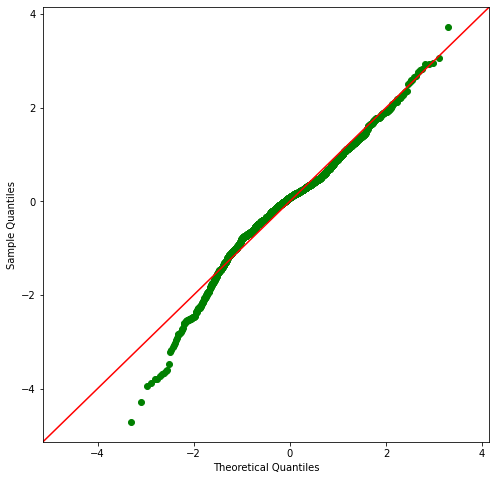

In [291]:
# checking if error terms are having normal distribution
sm.qqplot((y_train - y_train_pred), fit=True, line='45', color='green')
plt.show()

Insight:
The error terms are normally distributed

### Residual Analysis of the train data

- So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of it.

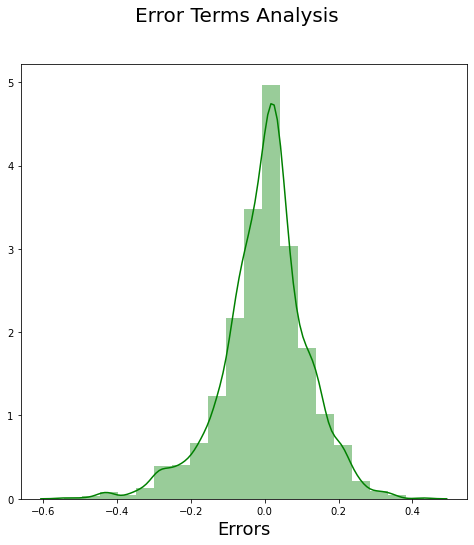

In [292]:
# So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of it.
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20, color= 'green')
fig.suptitle('Error Terms Analysis', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                                  # X-label
plt.show()

#### Insight: The error terms seem to be normally distributed and centered around zero.

### Multicollinearity between the predictor variables

In [293]:
# Check for the VIF values of the feature variables of selected model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_ml
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Adult_Mortality,3.18
7,thinness_1-19 years,2.67
2,BMI,2.32
3,under-five_deaths,1.77
4,HIV/AIDS,1.49
6,Population,1.45
1,Measles,1.36
5,GDP,1.35


### Insight:

 - From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

#### <u>Making Prediction<u>

    Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

### Applying the scaling on the test sets

### Rescaling Features

- Applying the scaling on the test sets

In [294]:
# Applying scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

data_test[numeric_columns] = scaler.transform(data_test[numeric_columns])

<ipython-input-294-76f0ef3b642f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test[numeric_columns] = scaler.transform(data_test[numeric_columns])
/Users/amruthabh/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### Dividing into X and Y sets for the model building

In [295]:
y_test = data_test.pop('Life_expectancy')
X_test = data_test

### Making Predictions Using the Final Model

In [296]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_ml.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [297]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Model Evaluation
Let's now plot the graph for actual versus predicted values.

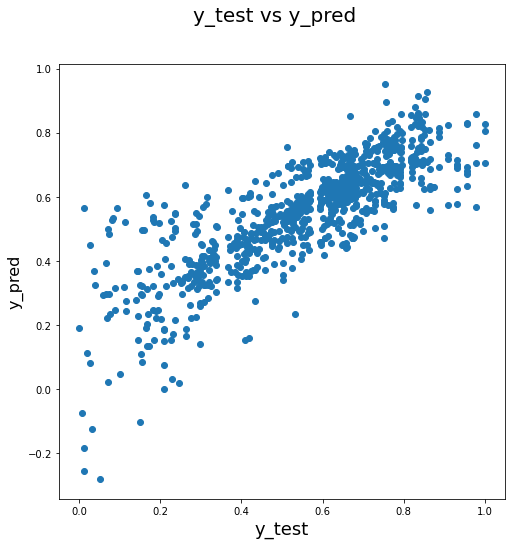

In [298]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

### RMSE Score

In [299]:
from sklearn.metrics import mean_squared_error

#Returns the mean squared error; we'll take a square root[RMSE]
print('RMSE score of the model : ',np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE score of the model :  0.1241094343798235


### R2 Score

In [300]:
from sklearn.metrics import r2_score

print('Train R2 : ', r2_score(y_train,y_train_pred))
print('Test R2 : ', r2_score(y_test,y_pred))

Train R2 :  0.6954448871260618
Test R2 :  0.6625289577912062


### Adjusted R^2 Value for TEST

In [301]:
# We already have the value of R^2 (calculated in above step)
R2_test= 0.8252168929692074
# Get the shape of X_test
X_test.shape

(877, 18)

In [302]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-R2_test)*(n-1)/(n-p-1)
print('adjusted_R2_Test : ', round(adjusted_r2,4))

adjusted_R2_Test :  0.8216
